In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from tensorflow import keras
from keras.utils import to_categorical

PARA 1 VIDEOS

In [3]:
#Video magnificado 
V = cv.VideoCapture("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/Parkinson_Subject/ParkinsonianPostural3_2-ideal-from-3-to-6-alpha-10-lambda_c-5-chromAtn-0.avi")
print("numero de frames: ", V.get(cv.CAP_PROP_FRAME_COUNT))
print("pos del frame", V.get(cv.CAP_PROP_POS_FRAMES))
frames = [cv.cvtColor(V.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
print ("tipo: ", type(frames), "longitud: ", len(frames))
print ("en una posición i del frames: ", type(frames[10]), frames[10].shape)

numero de frames:  289.0
pos del frame 0.0
tipo:  <class 'list'> longitud:  287
en una posición i del frames:  <class 'numpy.ndarray'> (320, 480, 3)


In [4]:
array_video =np.array(frames)
print(array_video.shape)

(287, 320, 480, 3)


(287, 480, 3)

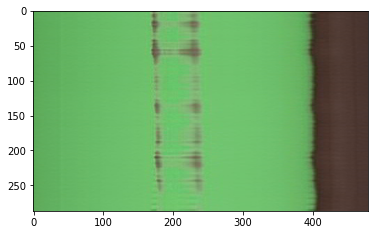

In [5]:
slice=array_video[:,50,:,:]
plt.imshow(slice)
slice.shape

(287, 480, 3)

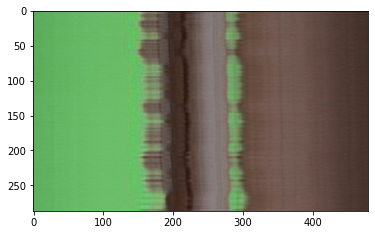

In [6]:
slice=array_video[:,80,:,:]
plt.imshow(slice)
slice.shape

(287, 480, 3)

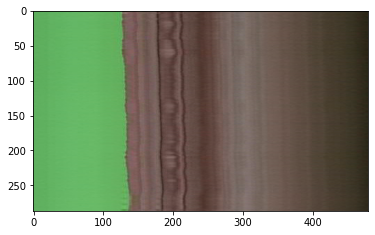

In [7]:
slice=array_video[:,120,:,:]
plt.imshow(slice)
slice.shape

PARA TODOS LOS VIDEOS


In [8]:
control = []
#y = []

lista_videos = np.sort(os.listdir("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/Control_Subject/"))
lista_videos2 = lista_videos[:20]
for video in lista_videos2:
  V = cv.VideoCapture("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/Control_Subject/" + video)
  frames = [cv.cvtColor(V.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
  frames = np.r_[frames]
  control.append(frames) 

control = np.r_[control]

slices_control2 = []
for video in control:
  m1 = video[:,50,:,:]
  m2 = video[:,80,:,:]
  m3 = video[:,120,:,:]
  m4 = video[:,220,:,:]
  m = [m1,m2, m3, m4]
  #y.append(0) # Control_Subject
  slices_control2.append(m)

slices_control2 =np.r_[slices_control2]
print(slices_control2.shape)

(20, 4, 287, 480, 3)


In [9]:
control = []

lista_videos3 = lista_videos[21:]
for video in lista_videos3:
  V = cv.VideoCapture("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/Control_Subject/" + video)
  frames = [cv.cvtColor(V.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
  frames = np.r_[frames]
  control.append(frames) 

control = np.r_[control]

print(control.shape)

slices_control3 = []
for video in control:
  m1 = video[:,50,:,:]
  m2 = video[:,80,:,:]
  m3 = video[:,120,:,:]
  m4 = video[:,220,:,:]
  m = [m1,m2, m3, m4]
  #y.append(0) # Control_Subject
  slices_control3.append(m)

slices_control3 =np.r_[slices_control3]

(19, 287, 320, 480, 3)


In [10]:
slices_control1 = np.concatenate((slices_control2, slices_control3), axis=0)
slices_control1.shape

(39, 4, 287, 480, 3)

In [11]:
np.save("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/slices/slices_control(2)", slices_control1)

In [2]:
parkinson = []

lista_videos = np.sort(os.listdir("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/Parkinson_Subject/"))
lista_videos2 = lista_videos[:20]
for video in lista_videos2:
  V = cv.VideoCapture("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/Parkinson_Subject/" + video)
  frames = [cv.cvtColor(V.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
  frames = np.r_[frames]
  parkinson.append(frames) 

parkinson = np.r_[parkinson]

slices_parkinson2 = []
for video in parkinson:
  m1 = video[:,50,:,:]
  m2 = video[:,80,:,:]
  m3 = video[:,120,:,:]
  m4 = video[:,220,:,:]
  m = [m1,m2, m3, m4]
  #y.append(1) # Parkinson_Subject
  slices_parkinson2.append(m)

slices_parkinson2 =np.r_[slices_parkinson2]

In [3]:
parkinson = []

lista_videos3 = lista_videos[21:]
for video in lista_videos3:
  V = cv.VideoCapture("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/Parkinson_Subject/" + video)
  frames = [cv.cvtColor(V.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
  frames = np.r_[frames]
  parkinson.append(frames) 

parkinson = np.r_[parkinson]

slices_parkinson3 = []
for video in parkinson:
  m1 = video[:,50,:,:]
  m2 = video[:,80,:,:]
  m3 = video[:,120,:,:]
  m4 = video[:,220,:,:]
  m = [m1,m2, m3, m4]
  #y.append(1) # Parkinson_Subject
  slices_parkinson3.append(m)

slices_parkinson3 =np.r_[slices_parkinson3]

In [4]:
slices_parkinson1 = np.concatenate((slices_parkinson2, slices_parkinson3), axis=0)
slices_parkinson1.shape

(39, 4, 287, 480, 3)

In [7]:
y = []
for i in range(78):
  if(i<39):
    y.append(0)
  else:
    y.append(1)

In [8]:
y = np.r_[y]
y.shape

(78,)

In [9]:
np.save("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/slices/slices_parkinson(2)", slices_parkinson1)
np.save("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/slices/etiquetas(2)", y)

LEER DATOS!

In [10]:
X1 = np.load('/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/slices/slices_control(2).npy', allow_pickle=True)
X2 = np.load('/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/slices/slices_parkinson(2).npy',  allow_pickle=True)
X = np.concatenate((X1, X2), axis=0)
y = np.load('/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/slices/etiquetas(2).npy',  allow_pickle=True)

In [11]:
X.shape , y.shape

((78, 4, 287, 480, 3), (78,))

### **m=1**

In [12]:
X = X[:,1,:,:,:]
X.shape

(78, 287, 480, 3)

In [13]:
perm = np.random.permutation(range(len(X)))
X=X[perm]
y=y[perm]

porcentaje = int(X.shape[0]*0.8)  # 80%
X_test = X[porcentaje:]
y_test = y[porcentaje:]

X_train = X[:porcentaje]
y_train = y[:porcentaje]

X_test.shape, y_test.shape, X_train.shape, y_train.shape

((16, 287, 480, 3), (16,), (62, 287, 480, 3), (62,))

In [14]:
X_train = X_train.reshape([-1, 287, 480, 3])
X_test = X_test.reshape([-1, 287, 480, 3])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train) 

X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0], "y_train:", y_train.shape)
print('Number of images in x_test', X_test.shape[0], "y_test: ", y_test.shape)

X_train shape: (62, 287, 480, 3)
Number of images in x_train 62 y_train: (62, 2)
Number of images in x_test 16 y_test:  (16, 2)


In [8]:
model_CNN =  tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=X_train[0].shape))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(tf.keras.layers.Flatten())    
model_CNN.add(tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_CNN.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform'))
model_CNN.add(tf.keras.layers.Dense(2, activation='softmax'))
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 287, 480, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 143, 240, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 143, 240, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 71, 120, 64)       0         
_________________________________________________________________
flatten (Flatten)            (None, 545280)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                17448992  
_________________________________________________________________
dense_1 (Dense)              (None, 16)                5

In [9]:
opt = tf.keras.optimizers.SGD()
model_CNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
history = model_CNN.fit(X_train, y_train, epochs=7 ,verbose=1, batch_size=16,validation_data=(X_test, y_test))

Epoch 1/7
4/4 [==============================] - 1s 280ms/step - loss: 0.8779 - accuracy: 0.4516 - val_loss: 0.6928 - val_accuracy: 0.3750
Epoch 2/7
4/4 [==============================] - 0s 120ms/step - loss: 0.6896 - accuracy: 0.5968 - val_loss: 0.6842 - val_accuracy: 0.7500
Epoch 3/7
4/4 [==============================] - 0s 123ms/step - loss: 0.6737 - accuracy: 0.7581 - val_loss: 0.6757 - val_accuracy: 0.7500
Epoch 4/7
4/4 [==============================] - 0s 124ms/step - loss: 0.6586 - accuracy: 0.7097 - val_loss: 0.6606 - val_accuracy: 0.7500
Epoch 5/7
4/4 [==============================] - 0s 122ms/step - loss: 0.6511 - accuracy: 0.7419 - val_loss: 0.6493 - val_accuracy: 0.7500
Epoch 6/7
4/4 [==============================] - 0s 124ms/step - loss: 0.6351 - accuracy: 0.7742 - val_loss: 0.6723 - val_accuracy: 0.4375
Epoch 7/7
4/4 [==============================] - 0s 120ms/step - loss: 0.5962 - accuracy: 0.7742 - val_loss: 0.6162 - val_accuracy: 0.8125


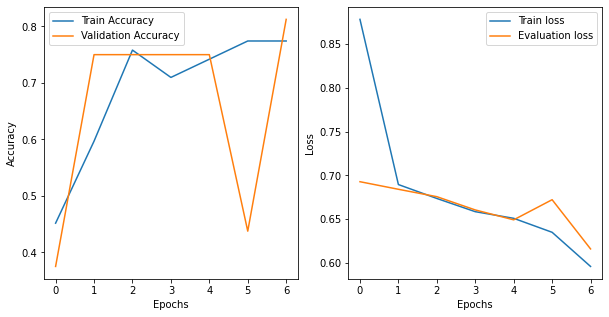

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='Train loss');
ax.plot(history.history['val_loss'], label='Evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [19]:
test_loss,test_acc = model_CNN.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.8125
Test accuracy: 0.8125


<Figure size 432x288 with 0 Axes>

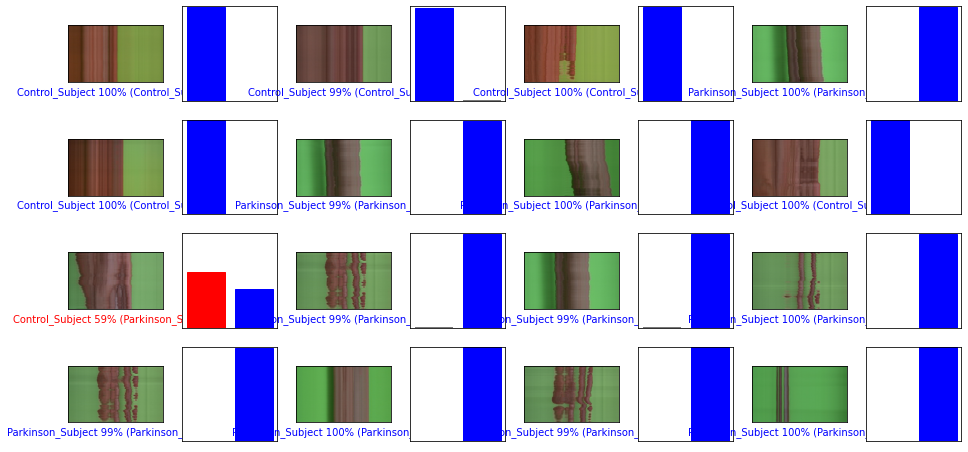

In [23]:
%run '/content/drive/My Drive/IA2/Proyecto/dl_plot.py'

predictions = model_CNN.predict(X_test)

num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, np.argmax(y_test ,axis=1), X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, np.argmax(y_test ,axis=1))

In [3]:
X1 = np.load('/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/slices/slices_control(2).npy', allow_pickle=True)
X2 = np.load('/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/slices/slices_parkinson(2).npy',  allow_pickle=True)
X = np.concatenate((X1, X2), axis=0)
y = np.load('/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/slices/etiquetas(2).npy',  allow_pickle=True)

### **m=2**


In [4]:
X = X[:,2,:,:,:]

In [5]:
perm = np.random.permutation(range(len(X)))
X=X[perm]
y=y[perm]

porcentaje = int(X.shape[0]*0.8)
X_test = X[porcentaje:]
y_test = y[porcentaje:]

X_train = X[:porcentaje]
y_train = y[:porcentaje]

X_test.shape, y_test.shape, X_train.shape, y_train.shape

((16, 287, 480, 3), (16,), (62, 287, 480, 3), (62,))

In [6]:
X_train = X_train.reshape([-1, 287, 480, 3])
X_test = X_test.reshape([-1, 287, 480, 3])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train) 

X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0], "y_train:", y_train.shape)
print('Number of images in x_test', X_test.shape[0], "y_test: ", y_test.shape)

X_train shape: (62, 287, 480, 3)
Number of images in x_train 62 y_train: (62, 2)
Number of images in x_test 16 y_test:  (16, 2)


In [10]:
history = model_CNN.fit(X_train, y_train, epochs=7 ,verbose=1, batch_size=16,validation_data=(X_test, y_test))

Epoch 1/7
4/4 [==============================] - 1s 277ms/step - loss: 0.6991 - accuracy: 0.4355 - val_loss: 0.6785 - val_accuracy: 0.5000
Epoch 2/7
4/4 [==============================] - 0s 125ms/step - loss: 0.6914 - accuracy: 0.5806 - val_loss: 0.7888 - val_accuracy: 0.5000
Epoch 3/7
4/4 [==============================] - 0s 123ms/step - loss: 0.7144 - accuracy: 0.5968 - val_loss: 0.6475 - val_accuracy: 0.7500
Epoch 4/7
4/4 [==============================] - 0s 122ms/step - loss: 0.6374 - accuracy: 0.7742 - val_loss: 0.6380 - val_accuracy: 0.6875
Epoch 5/7
4/4 [==============================] - 0s 122ms/step - loss: 0.6038 - accuracy: 0.7419 - val_loss: 0.5936 - val_accuracy: 0.8125
Epoch 6/7
4/4 [==============================] - 0s 122ms/step - loss: 0.6845 - accuracy: 0.5645 - val_loss: 0.6098 - val_accuracy: 0.6875
Epoch 7/7
4/4 [==============================] - 0s 123ms/step - loss: 0.5461 - accuracy: 0.7742 - val_loss: 0.5370 - val_accuracy: 0.8125


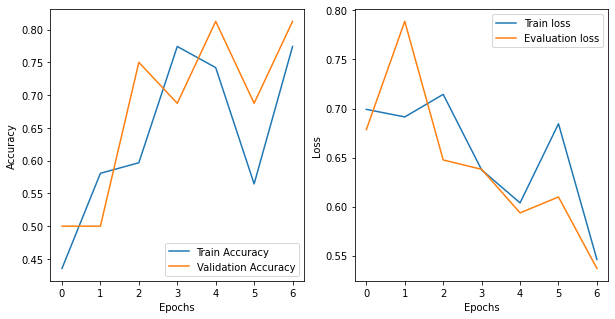

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='Train loss');
ax.plot(history.history['val_loss'], label='Evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [12]:
test_loss,test_acc = model_CNN.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 4ms/step - loss: 0.5370 - accuracy: 0.8125
Test accuracy: 0.8125


<Figure size 432x288 with 0 Axes>

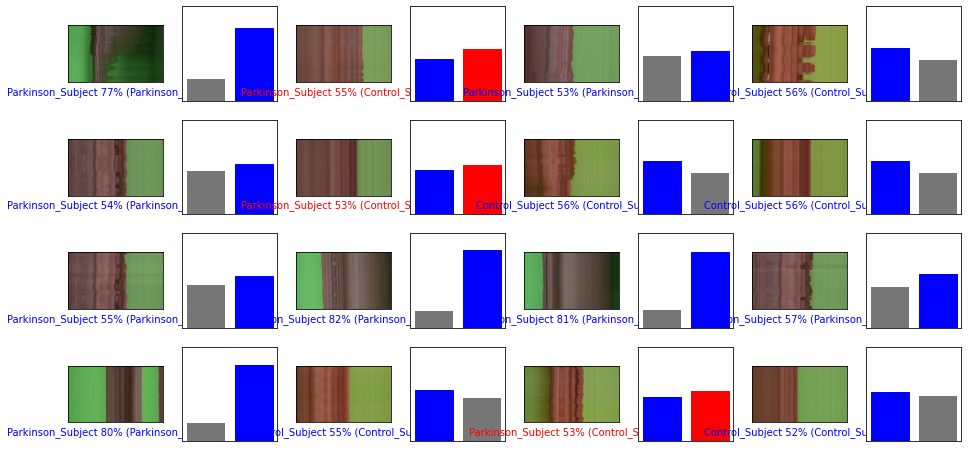

In [13]:
%run '/content/drive/My Drive/IA2/Proyecto/dl_plot.py'

predictions = model_CNN.predict(X_test)

num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, np.argmax(y_test ,axis=1), X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, np.argmax(y_test ,axis=1))

In [14]:
X1 = np.load('/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/slices/slices_control(2).npy', allow_pickle=True)
X2 = np.load('/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/slices/slices_parkinson(2).npy',  allow_pickle=True)
X = np.concatenate((X1, X2), axis=0)
y = np.load('/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Magnified/slices/etiquetas(2).npy',  allow_pickle=True)

### **m=3**

In [15]:
X = X[:,3,:,:,:]

In [16]:
perm = np.random.permutation(range(len(X)))
X=X[perm]
y=y[perm]

porcentaje = int(X.shape[0]*0.8)
X_test = X[porcentaje:]
y_test = y[porcentaje:]

X_train = X[:porcentaje]
y_train = y[:porcentaje]

X_test.shape, y_test.shape, X_train.shape, y_train.shape

((16, 287, 480, 3), (16,), (62, 287, 480, 3), (62,))

In [17]:
X_train = X_train.reshape([-1, 287, 480, 3])
X_test = X_test.reshape([-1, 287, 480, 3])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train) 

X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0], "y_train:", y_train.shape)
print('Number of images in x_test', X_test.shape[0], "y_test: ", y_test.shape)

X_train shape: (62, 287, 480, 3)
Number of images in x_train 62 y_train: (62, 2)
Number of images in x_test 16 y_test:  (16, 2)


In [18]:
history = model_CNN.fit(X_train, y_train, epochs=7 ,verbose=1, batch_size=8,validation_data=(X_test, y_test))

Epoch 1/7
8/8 [==============================] - 1s 99ms/step - loss: 0.3870 - accuracy: 0.8871 - val_loss: 0.5345 - val_accuracy: 0.6250
Epoch 2/7
8/8 [==============================] - 1s 65ms/step - loss: 0.2317 - accuracy: 0.9194 - val_loss: 0.1400 - val_accuracy: 0.9375
Epoch 3/7
8/8 [==============================] - 1s 66ms/step - loss: 0.0881 - accuracy: 1.0000 - val_loss: 0.4188 - val_accuracy: 0.7500
Epoch 4/7
8/8 [==============================] - 1s 66ms/step - loss: 0.1246 - accuracy: 0.9677 - val_loss: 0.0991 - val_accuracy: 0.9375
Epoch 5/7
8/8 [==============================] - 1s 66ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.0469 - val_accuracy: 1.0000
Epoch 6/7
8/8 [==============================] - 1s 67ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.0657 - val_accuracy: 0.9375
Epoch 7/7
8/8 [==============================] - 1s 66ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0604 - val_accuracy: 0.9375


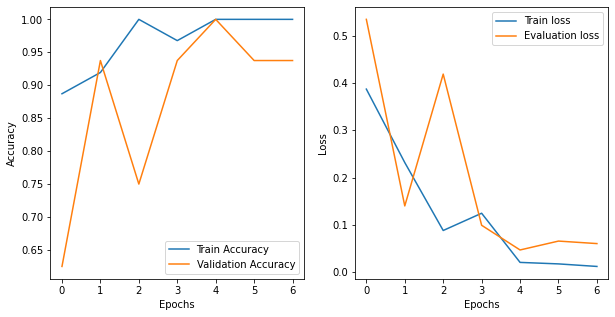

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='Train loss');
ax.plot(history.history['val_loss'], label='Evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [20]:
test_loss,test_acc = model_CNN.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.9375
Test accuracy: 0.9375


<Figure size 432x288 with 0 Axes>

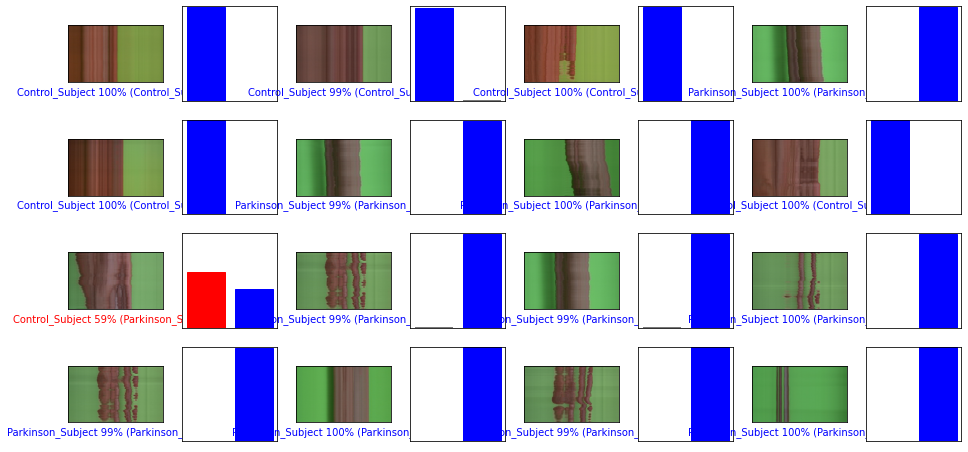

In [21]:
%run '/content/drive/My Drive/IA2/Proyecto/dl_plot.py'

predictions = model_CNN.predict(X_test)

num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, np.argmax(y_test ,axis=1), X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, np.argmax(y_test ,axis=1))